<a href="https://colab.research.google.com/github/VakhromeevaKate/sechenov-ai-methods-course/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решающие деревья (Decision Trees)

Дерево решений — это один из алгоритмов ML, основанный на правиле: «Если <какое-то условие>, то <результат>».





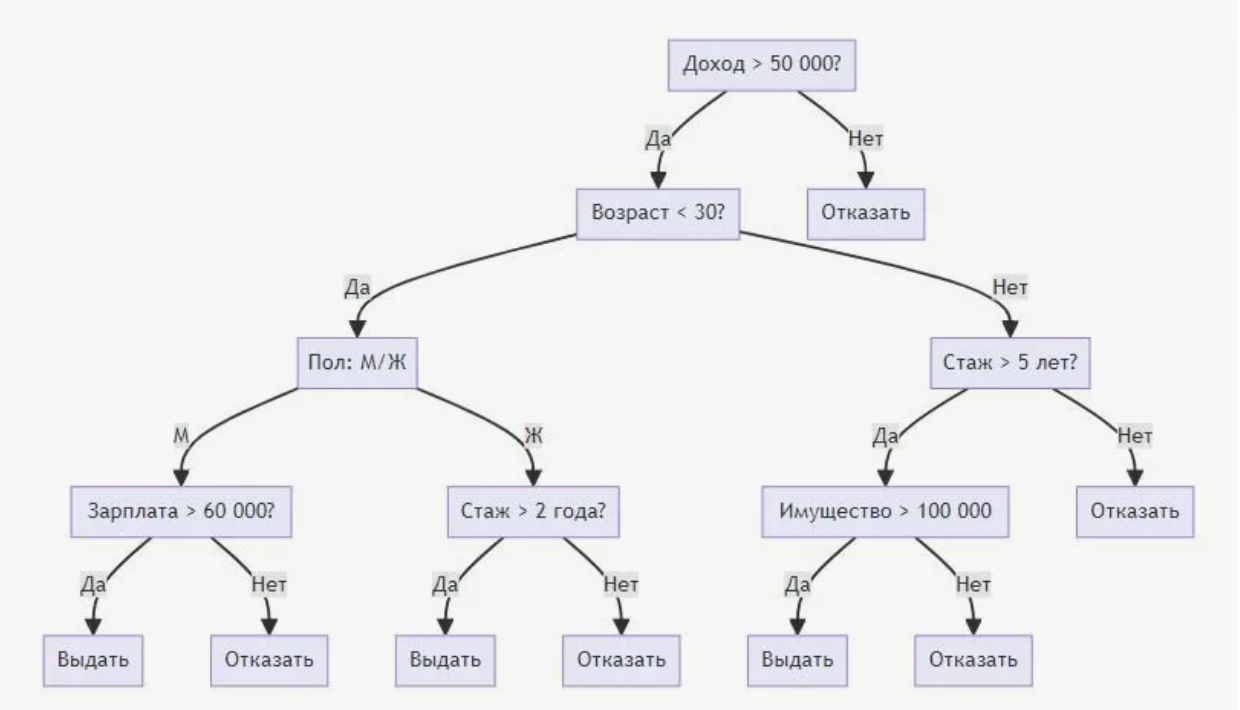

Деревья в машинном обучении строятся **сверху вниз**, начиная с корня. На каждом шаге данные в узле делятся на части (чаще всего, на две) по определённому правилу. Это правило ищет такой признак и такое его пороговое значение, которые лучше всего разделят данные согласно заданному критерию качества.

**Как выбирается разбиение?**

Перебираются все возможные признаки.

Для каждого признака перебираются его уникальные значения в качестве кандидатов в порог.

Выбираются те признак и порог, которые дают наилучшее разделение.

**Когда строительство прекращается?**
Процесс останавливается, когда в узле выполняется условие останова. Тогда этот узел становится листом и выдает итоговый прогноз.

**Что прогнозирует лист?**

В классификации: это самый частый класс среди объектов в листе.

В регрессии: это среднее значение целевой переменной для всех объектов в листе.



**Пример**
Нужно предсказать, пойдёт ли человек гулять.

Данные:


Погода  	Ветер	    Пошёл гулять?
Солнечно	Сильный	  Нет
Солнечно	Слабый	  Да
Солнечно	Слабый	  Да
Дождь	    Сильный	  Нет
Дождь	    Сильный	  Нет

**1. Выбор корневого узла**
Алгоритм перебирает признаки "Погода" и "Ветер", чтобы найти лучшее разделение.

Вариант 1: Разделить по "Погоде"
Солнечно: [Нет, Да, Да] -> 2 "Да", 1 "Нет"
Дождь: [Нет, Нет, Нет] -> 0 "Да", 3 "Нет" (идеально однородная группа!)

Общее качество: Одна идеальная группа и одна неоднородная.

Вариант 2: Разделить по "Ветру"
Сильный: [Нет, Нет, Нет] -> 0 "Да", 3 "Нет" (идеально однородная группа!)
Слабый: [Да, Да, Нет] -> 2 "Да", 1 "Нет"
Общее качество: Одна идеальная группа и одна неоднородная.

Вывод: Оба признака дают один чистый узел. Алгоритм выберет один из них (например, "Погода") в качестве корня.

Дерево начинает расти:
```
        [Погода?]
         /    \
   Солнечно   Дождь
      /          \
[Нет, Да, Да]  [Все "Нет"]
```

**2. Разбиение узла "Солнечно"**
Нужно разбить левую ветку [Нет, Да, Да]. Используем признак "Ветер".

Данные в этой ветке:
(Солнечно, Сильный) -> Нет
(Солнечно, Слабый) -> Да
(Солнечно, Слабый) -> Да

Перебираем разделение по "Ветру":
Сильный: [Нет] -> 100% "Нет" (чистая группа)
Слабый: [Да, Да] -> 100% "Да" (чистая группа)

Вывод: Разделение по "Ветру" идеально разделило оставшиеся данные.

**Итоговое дерево принятия решений**
```
        [Погода?]
         /      \
   Солнечно     Дождь
      /            \
  [Ветер?]        ["Нет"]
    /     \
  Сильный Слабый
  /        \
["Нет"]   ["Да"]
```

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [16]:
# Загрузка датасета
data = load_iris()
X = data.data
y = data.target

In [17]:
print(f"X size = {X.size}")
print(f"y size = {y.size}")

X size = 600
y size = 150


In [18]:
iris_pd = pd.DataFrame(data=X, columns=data.feature_names)

In [19]:
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Мы хотим предсказать класс ириса (1, 2 или 3)

In [23]:
# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 99)
# Параметр test_size определяет долю данных для тестовой выборки
# Для воспроизводимости результатов устанавливаем random_state
# Про random_state можно почитать, например, здесь: https://www.geeksforgeeks.org/machine-learning/what-is-scikit-learn-random-state-in-splitting-dataset/

In [24]:
# Определяем модель
clf = DecisionTreeClassifier(random_state=1)

In [25]:
# Обучаем модель
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [26]:
# Проверяем модель
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9555555555555556


In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier